## Задача 3. Многоклассовая классификация и множественная классификация/регрессия
Андрей Плахтий Дмитриевич, 22.М08-мм

- [x] Изучите [возможности sklearn](https://scikit-learn.org/stable/modules/multiclass.html#multiclass-classification) для решения задач **Multiclass classification**, **Multilabel classification** и **Multioutput Regression**. Основные компоненты библиотеки указаны на рисунке ниже.
![multi_org_chart](https://scikit-learn.org/stable/_images/multi_org_chart.png)

- [x] Найдите данные, на которых можно решить задачу **Multiclass classification** (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задачи.
- [x] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи.
- [x] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [x] Используя стратегии **OneVsRest**, **OneVsOne** и **OutputCode** решите задачу **Multiclass classification** для каждого из пройденных базового алгоритма классификации (**logistic regression, svm, knn, naive bayes, decision tree**). При обучении использовать **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания.
- [x] Замерить время обучения каждой модели для каждой стратегии.
- [x] Для оценки качества моделей используйте метрику **AUC-ROC**.
- [x] Сравнить время обучения и качество всех моделей и всех стратегий. Сделать выводы.
- [x] * (**+3 балла**) Повторить все пункты для задачи **Multilabel classification** (классификация с несколькими целевыми признаками, например, бинарными). В качестве стратегий попробовать **MultiOutputClassifier** и **ClassifierChain**.
- [x] * (**+2 балла**) Повторить все пункты для задачи **Multioutput Regression** (регрессия с несколькими целевыми признаками, вещественными). Модель попробовать как минимум одну: **Ridge**. В качестве стратегий попробовать **MultiOutputRegressor** и **RegressorChain**. В качестве метрики использовать **R2**.

In [414]:
import time
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import f1_score
from sklearn.model_selection import HalvingGridSearchCV, train_test_split
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier, OutputCodeClassifier
from sklearn.multioutput import MultiOutputClassifier, ClassifierChain
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore')

In [415]:
df = pd.read_csv("train.xls")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [416]:
df.shape

(2000, 21)

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [418]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [419]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи.

<AxesSubplot: xlabel='price_range', ylabel='int_memory'>

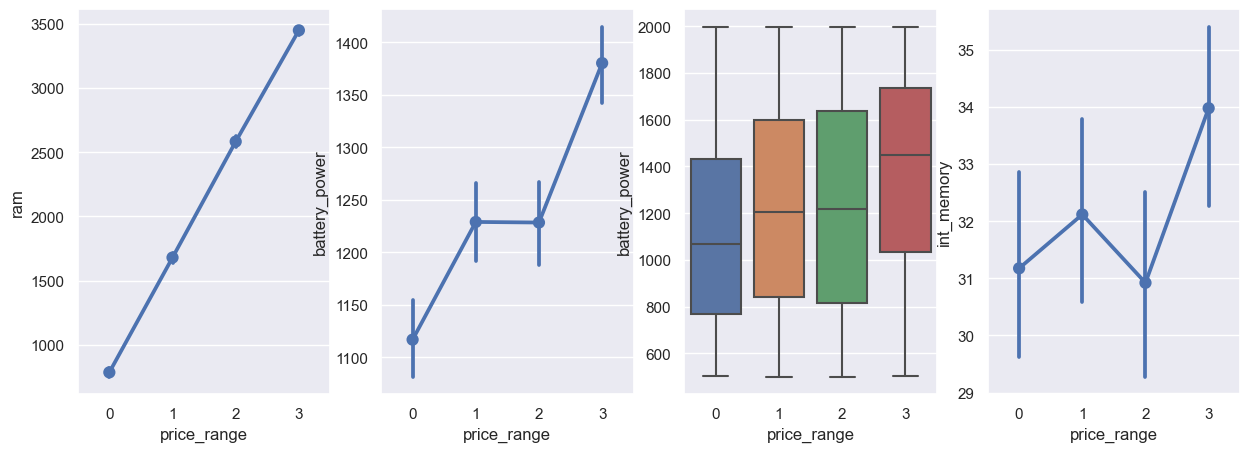

In [420]:
fig, axs = plt.subplots(figsize=(15,5), ncols=4)
sns.pointplot(x='price_range', y='ram', data=df, ax=axs[0])
sns.pointplot(x='price_range', y='battery_power', data=df, ax=axs[1])
sns.boxplot(x='price_range',y='battery_power',data=df, ax=axs[2])
sns.pointplot(x='price_range',y='int_memory',data=df, ax=axs[3])

In [421]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [422]:
categorical_col = ['blue','dual_sim','four_g','three_g','touch_screen','price_range']

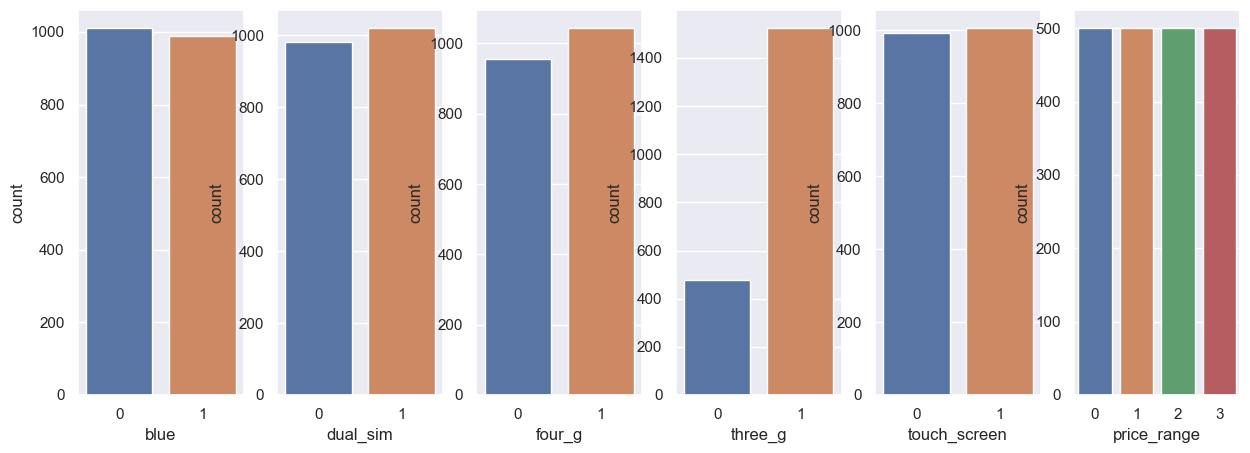

In [423]:
fig, axs = plt.subplots(figsize=(15,5), ncols=categorical_col.__len__())
num = 0
for i in categorical_col:
    sns.countplot(x=i, data=df, ax=axs[num])
    num = num + 1


Text(0.5, 1.0, 'Correlation')

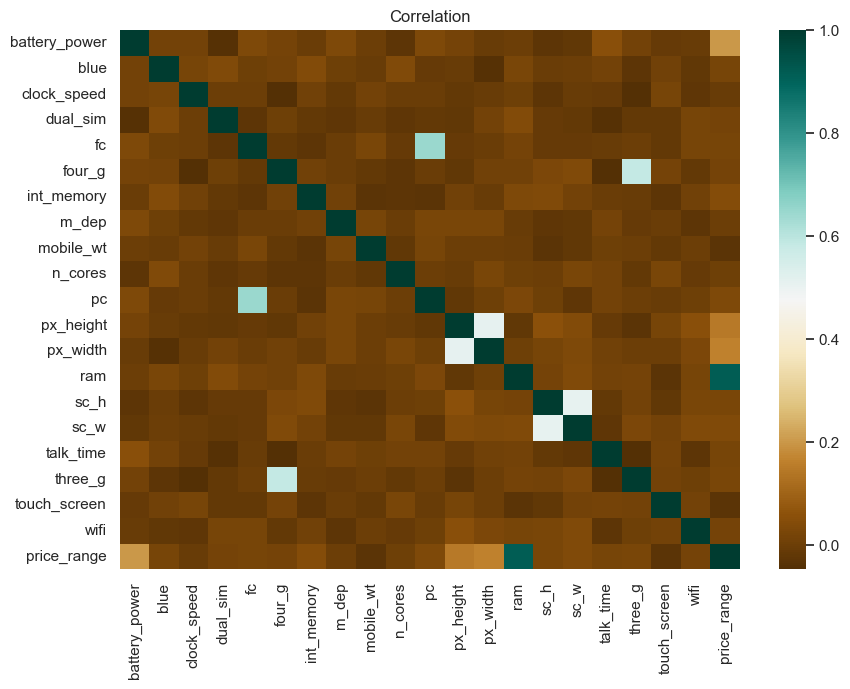

In [424]:
corr=df.corr()
fig = plt.figure(figsize=(10,7))
r = sns.heatmap(corr, cmap='BrBG')
r.set_title("Correlation")

<AxesSubplot: xlabel='touch_screen', ylabel='ram'>

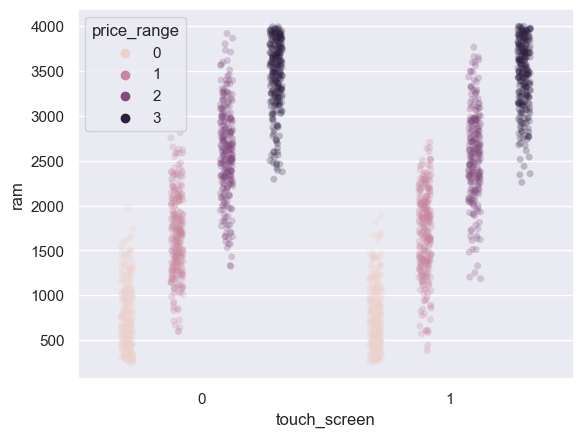

In [425]:
sns.stripplot(x="touch_screen", y="ram", hue="price_range",
              data=df, dodge=True, jitter=True,
              alpha=.25, zorder=1)

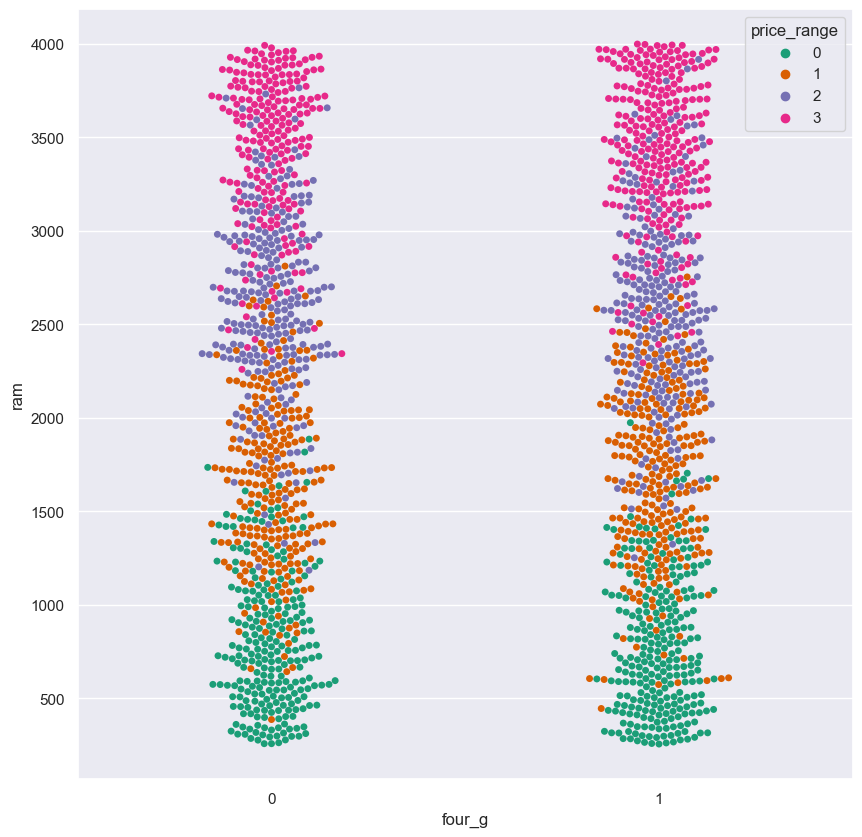

In [426]:
f, ax = plt.subplots(figsize=(10, 10))
ax=sns.swarmplot(x="four_g", y="ram", hue="price_range",
                 palette="Dark2", data=df)
ax=sns.set(style="darkgrid")

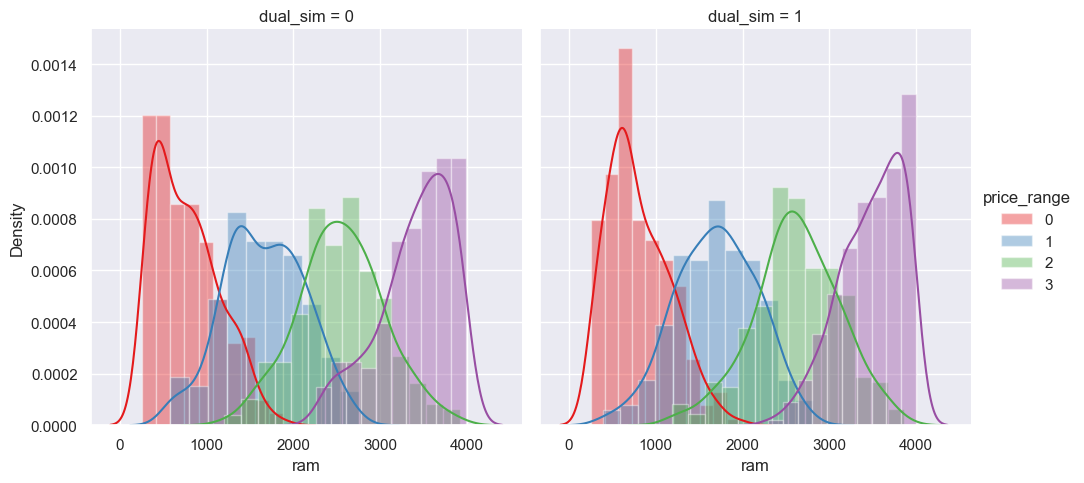

In [427]:
grid = sns.FacetGrid(df, col="dual_sim", hue="price_range", palette="Set1",height=5)
grid = (grid.map(sns.distplot, "ram").add_legend())

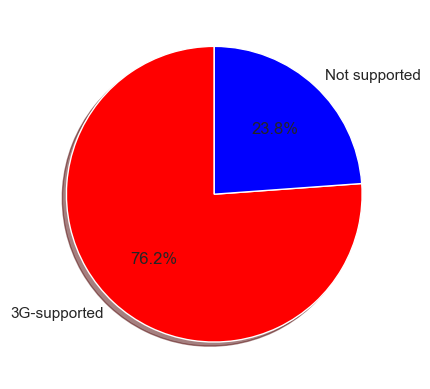

In [428]:
labels = ["3G-supported",'Not supported']
values = df['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['red', 'blue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

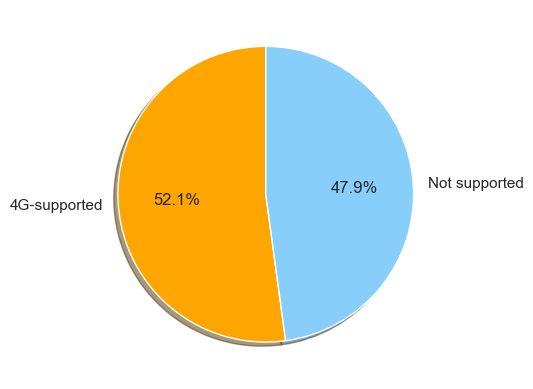

In [429]:
labels = ["4G-supported",'Not supported']
values = df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['orange', 'lightskyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

Text(0.5, 0, 'MegaPixels')

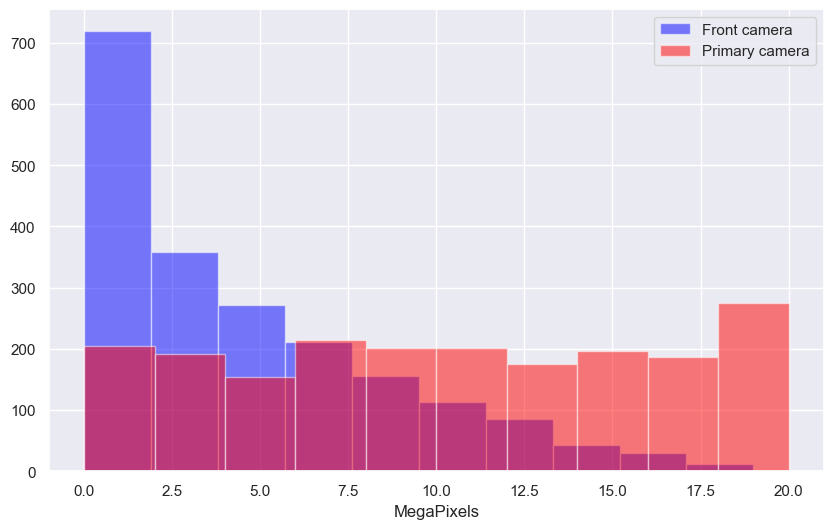

In [430]:
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

Text(0.5, 1.0, 'Correlation ')

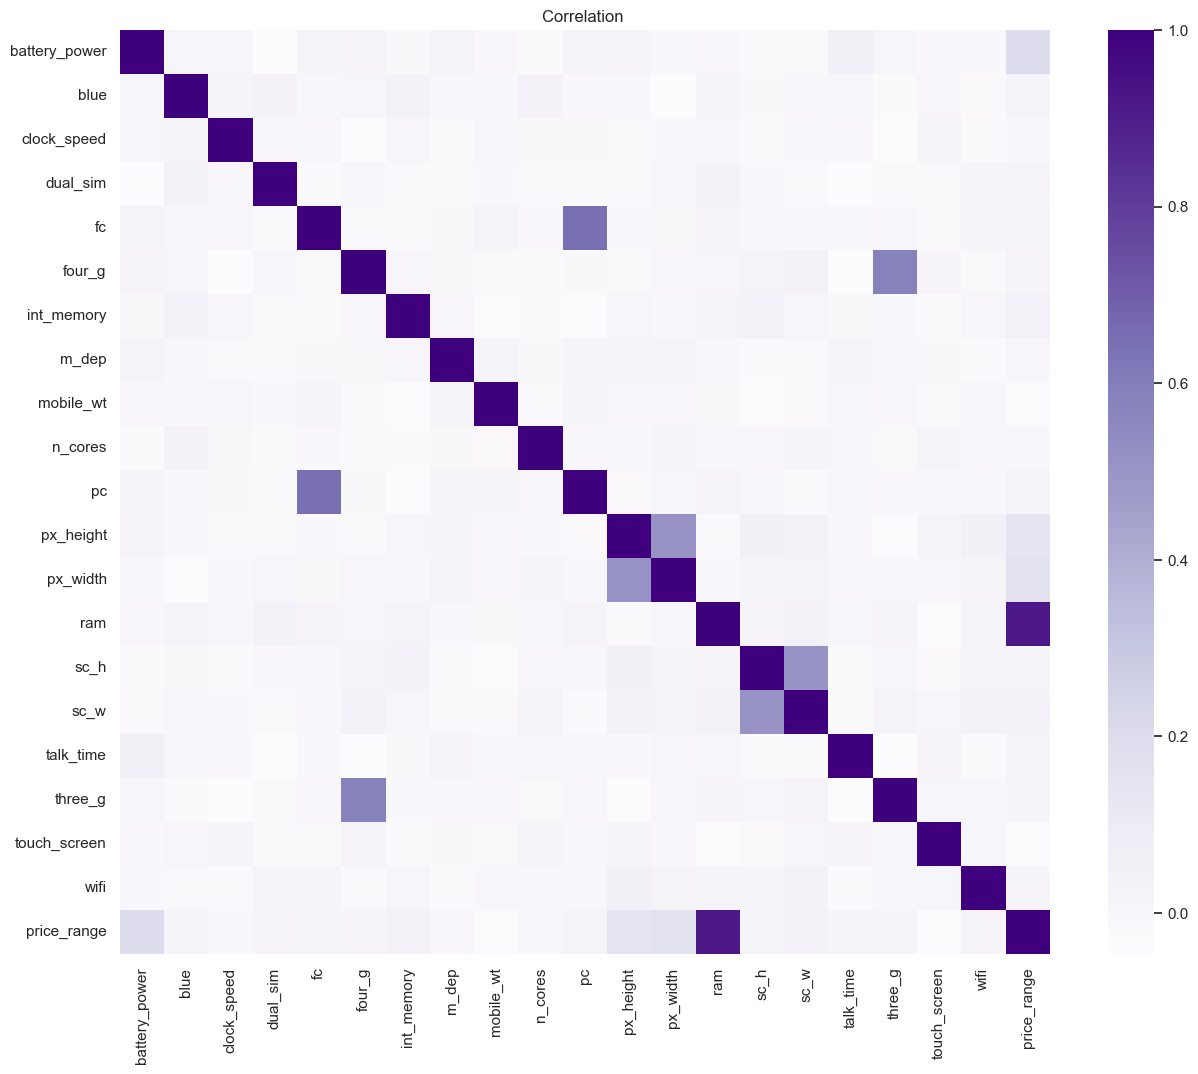

In [431]:
corr=df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation ")

In [432]:
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

Выводы: будет использоваться категория цены (0 - низкая стоимость, 1 - средняя, 2 - высокая, 3 - очень высокая). Она сильно зависит от объема оперативной памяти.

Используя стратегии **OneVsRest**, **OneVsOne** и **OutputCode** решите задачу **Multiclass classification** для каждого из пройденных базового алгоритма классификации (**logistic regression, svm, knn, naive bayes, decision tree**). При обучении использовать **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания.

In [433]:
def fit_model(clazz, parameters):
    model = clazz()
    sh = HalvingGridSearchCV(model, parameters, cv=5, scoring='f1',
                             factor=2, min_resources=20).fit(X_train_scaled, y_train)
    return model.__class__.__name__, sh.best_estimator_

def add_model(pair, models):
    models[pair[0]] = pair[1]

In [434]:
X = df.drop('price_range', axis=1)
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [435]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_test.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

In [436]:
rfecv = RFECV(estimator=LogisticRegression())
rfecv.fit(X_train_scaled, y_train)
selected_features = list(X_train_scaled.columns[rfecv.support_])
print(f'Кол-во оптимальных признаков: {rfecv.n_features_}\n'
      f'Признкаи:{selected_features}')

Кол-во оптимальных признаков: 5
Признкаи:['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram']


In [437]:
X_train_scaled = X_train_scaled[selected_features]
X_test_scaled = X_test_scaled[selected_features]
X_train_scaled.head()

,battery_power,mobile_wt,px_height,px_width,ram
0,-0.547855,1.669421,1.716917,0.857252,0.429293
1,0.051190,-1.417145,-0.821703,-1.289582,-0.565343
2,-0.545603,1.103079,2.033679,1.192334,1.494248
3,1.422688,0.734956,0.737218,-0.027826,-0.817009
4,0.936246,0.536736,-1.328522,-1.169415,0.444097


In [438]:
models = {}
add_model(fit_model(LogisticRegression, {'max_iter': [100, 1000], 'C': [1, 0.5, 0.1]}), models)
add_model(fit_model(SVC, {'C':[1, 0.5, 0.1]}), models)
add_model(fit_model(KNeighborsClassifier,  {'n_neighbors': [3, 5, 7]}), models)
add_model(fit_model(GaussianNB, {}), models)
add_model(fit_model(DecisionTreeClassifier, {'max_depth': [3, 4, 5], 'min_samples_split': [2, 5], 'min_samples_leaf': [2, 4, 6], 'max_features': [2, 4, 6]}), models)

In [439]:
print(models)

{'LogisticRegression': LogisticRegression(C=0.1), 'SVC': SVC(C=0.5), 'KNeighborsClassifier': KNeighborsClassifier(), 'GaussianNB': GaussianNB(), 'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=5, max_features=6, min_samples_leaf=6)}


In [440]:
predict_results = {}
for name, model in models.items():
    predicted = model.predict(X_test_scaled);
    predict_results[name] = predicted
    print(name, ": ", f1_score(predicted, y_test, average='macro'))

LogisticRegression :  0.9599661051277829
SVC :  0.9432337163138753
KNeighborsClassifier :  0.842254142022703
GaussianNB :  0.8076012106385813
DecisionTreeClassifier :  0.7978497734351235


In [441]:
accuracy = {'one': dict(), 'rest': dict(), 'code': dict()}
times = {'one': dict(), 'rest': dict(), 'code': dict()}

In [442]:
# OneVsOne
for name, model in models.items():
    classifier = OneVsOneClassifier(model)
    start_time = time.time()
    classifier.fit(X_train_scaled, y_train)
    finish_time = time.time()
    accuracy['one'][name] = classifier.score(X_test_scaled, y_test)
    times['one'][name] = finish_time - start_time

In [443]:
# OneVsRest
for name, model in models.items():
    classifier = OneVsRestClassifier(model)
    start_time = time.time()
    classifier.fit(X_train_scaled, y_train)
    finish_time = time.time()
    accuracy['rest'][name] = classifier.score(X_test_scaled, y_test)
    times['rest'][name] = finish_time - start_time

In [444]:
# OutputCode
for name, model in models.items():
    classifier = OutputCodeClassifier(model, code_size=2, random_state=49)
    start_time = time.time()
    classifier.fit(X_train_scaled, y_train)
    finish_time = time.time()
    accuracy['code'][name] = classifier.score(X_test_scaled, y_test)
    times['code'][name] = finish_time - start_time

Сравнить время обучения и качество всех моделей и всех стратегий. Сделать выводы.

In [445]:
print(accuracy)

{'one': {'LogisticRegression': 0.9772727272727273, 'SVC': 0.943939393939394, 'KNeighborsClassifier': 0.8484848484848485, 'GaussianNB': 0.8075757575757576, 'DecisionTreeClassifier': 0.8181818181818182}, 'rest': {'LogisticRegression': 0.8272727272727273, 'SVC': 0.8848484848484849, 'KNeighborsClassifier': 0.8454545454545455, 'GaussianNB': 0.793939393939394, 'DecisionTreeClassifier': 0.8287878787878787}, 'code': {'LogisticRegression': 0.8393939393939394, 'SVC': 0.8818181818181818, 'KNeighborsClassifier': 0.8424242424242424, 'GaussianNB': 0.7893939393939394, 'DecisionTreeClassifier': 0.8545454545454545}}


In [446]:
print(times)

{'one': {'LogisticRegression': 0.0, 'SVC': 0.015606164932250977, 'KNeighborsClassifier': 0.0, 'GaussianNB': 0.0, 'DecisionTreeClassifier': 0.015727996826171875}, 'rest': {'LogisticRegression': 0.0, 'SVC': 0.04748082160949707, 'KNeighborsClassifier': 0.0, 'GaussianNB': 0.0, 'DecisionTreeClassifier': 0.0}, 'code': {'LogisticRegression': 0.015513181686401367, 'SVC': 0.14172935485839844, 'KNeighborsClassifier': 0.020607948303222656, 'GaussianNB': 0.0025091171264648438, 'DecisionTreeClassifier': 0.029502391815185547}}


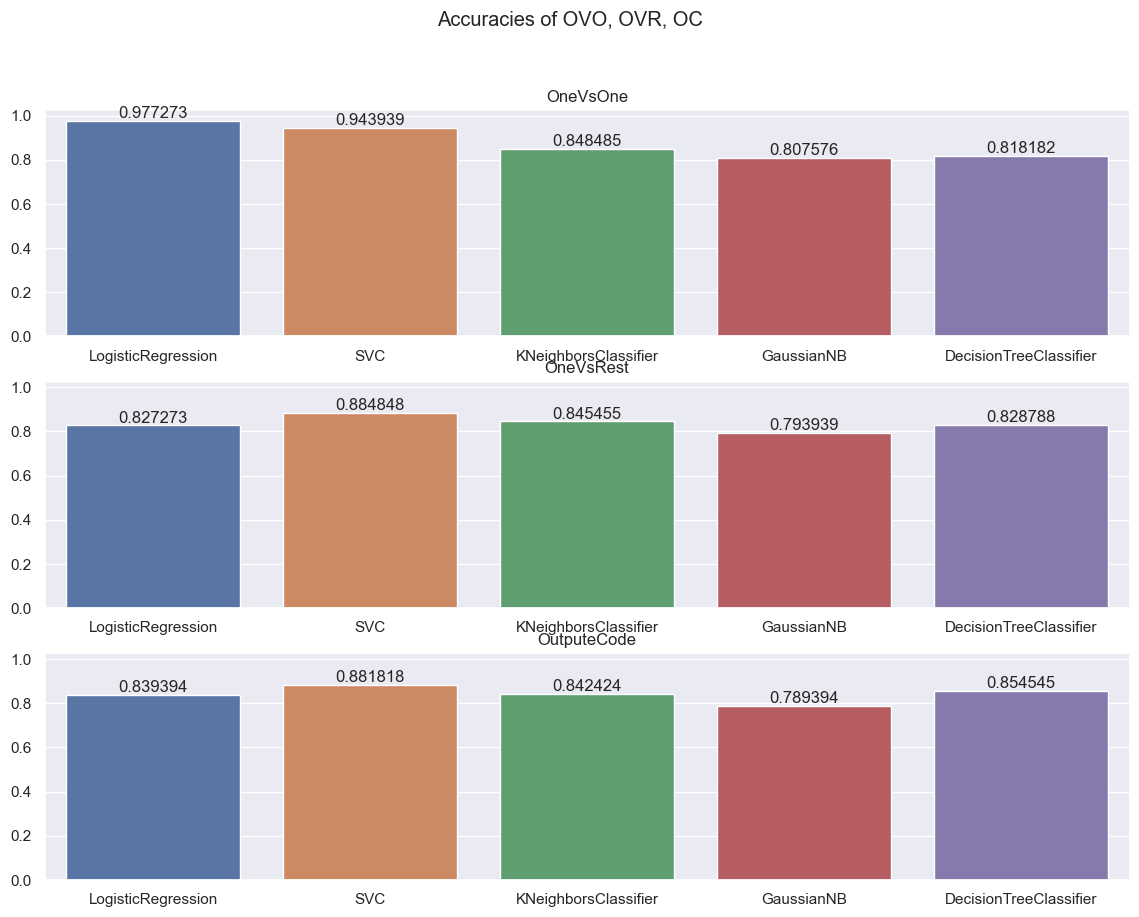

In [447]:
fig, axes = plt.subplots(3, 1, figsize=(14, 10), sharey=True)
fig.suptitle('Accuracies of OVO, OVR, OC')

b1 = sns.barplot(ax=axes[0], x=list(accuracy['one'].keys()), y=list(accuracy['one'].values()))
axes[0].set_title('OneVsOne')
b1.bar_label(b1.containers[0])
b2 = sns.barplot(ax=axes[1], x=list(accuracy['rest'].keys()), y=list(accuracy['rest'].values()))
axes[1].set_title('OneVsRest')
b2.bar_label(b2.containers[0])
b3 = sns.barplot(ax=axes[2], x=list(accuracy['code'].keys()), y=list(accuracy['code'].values()))
axes[2].set_title('OutputeCode')
b3.bar_label(b3.containers[0])

plt.show()

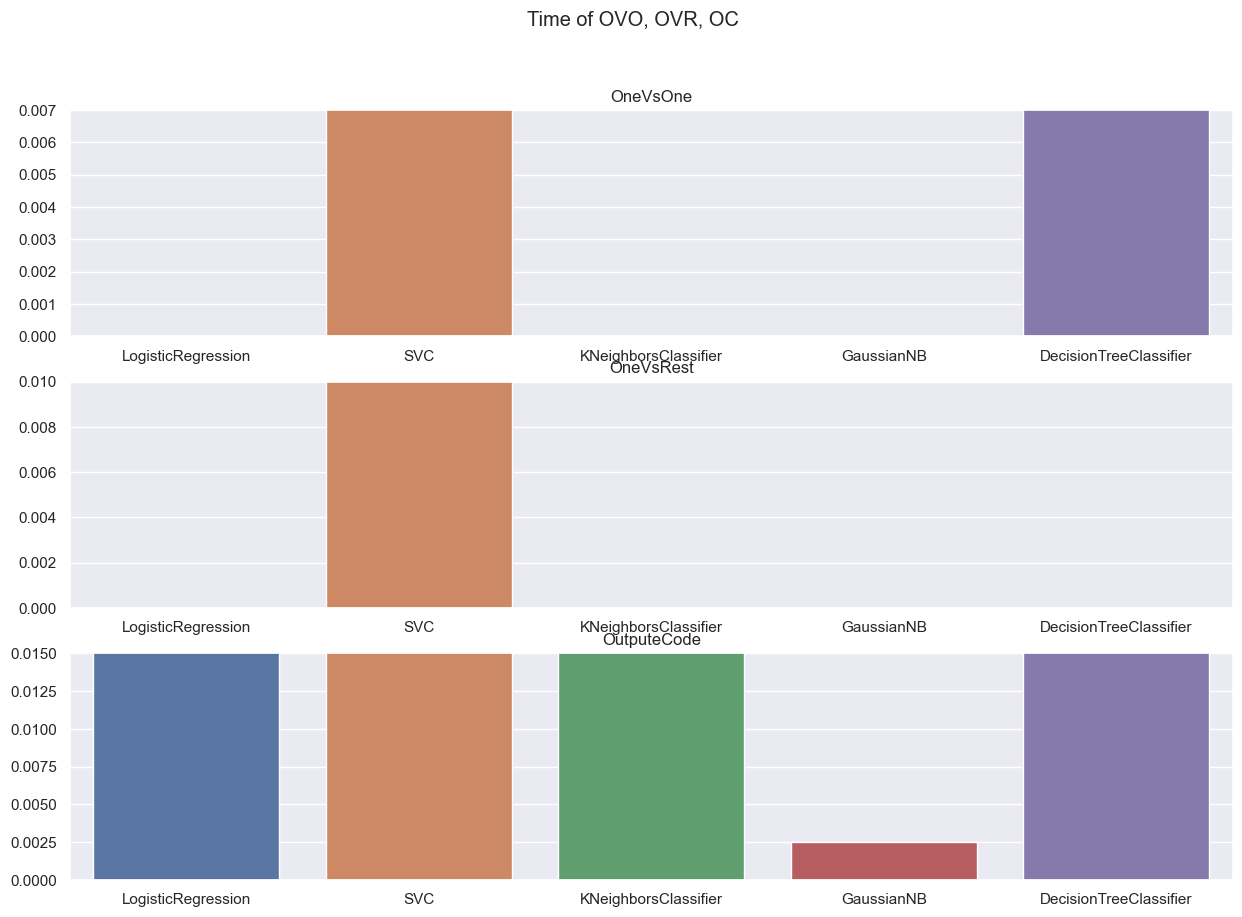

In [448]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10), sharey=False)
fig.suptitle('Time of OVO, OVR, OC')

b1 = sns.barplot(ax=axes[0], x=list(times['one'].keys()), y=list(times['one'].values()))
axes[0].set_title('OneVsOne')
b1.set_ylim(0, 0.007)
b2 = sns.barplot(ax=axes[1], x=list(times['rest'].keys()), y=list(times['rest'].values()))
axes[1].set_title('OneVsRest')
b2.set_ylim(0, 0.01)
b3 = sns.barplot(ax=axes[2], x=list(times['code'].keys()), y=list(times['code'].values()))
axes[2].set_title('OutputeCode')
b3.set_ylim(0, 0.015)

plt.show()

Выводы: Бинарная классификация — это задачи, в которых примерам присваивается ровно один из двух классов. Мультиклассовая классификация — это те задачи, в которых примерам присваивается ровно один из более чем двух классов, например, для категории цены.

Повторить все пункты для задачи **Multilabel classification** (классификация с несколькими целевыми признаками, например, бинарными). В качестве стратегий попробовать **MultiOutputClassifier** и **ClassifierChain**.

In [449]:
corr.sort_values(by=["four_g"],ascending=False).iloc[0].sort_values(ascending=False)

four_g           1.000000
three_g          0.584246
sc_w             0.037005
sc_h             0.027166
touch_screen     0.016758
battery_power    0.015665
price_range      0.014772
blue             0.013443
int_memory       0.008690
px_width         0.007448
ram              0.007313
dual_sim         0.003187
m_dep           -0.001823
pc              -0.005598
mobile_wt       -0.016537
fc              -0.016560
wifi            -0.017620
px_height       -0.019236
n_cores         -0.029706
clock_speed     -0.043073
talk_time       -0.046628
Name: four_g, dtype: float64

In [450]:
def fit_model(clazz, parameters):
    model = clazz()
    sh = HalvingGridSearchCV(model, parameters, cv=5, scoring='f1',
                             factor=2, min_resources=20).fit(X_train, y_train)
    return model.__class__.__name__, sh.best_estimator_

def add_model(pair, models):
    models[pair[0]] = pair[1]

In [451]:
X = df.drop(['four_g', 'three_g'], axis=1)
y = df[['four_g', 'three_g']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [452]:
accuracy = {'multi': dict(), 'chain': dict()}
times = {'multi': dict(), 'chain': dict()}
# MultiOutputClassifier
for name, model in models.items():
    classifier = MultiOutputClassifier(model)
    start_time = time.time()
    classifier.fit(X_train, y_train)
    finish_time = time.time()
    accuracy['multi'][name] = classifier.score(X_test, y_test)
    times['multi'][name] = finish_time - start_time
# ClassifierChain
for name, model in models.items():
    classifier = ClassifierChain(model)
    start_time = time.time()
    classifier.fit(X_train, y_train)
    finish_time = time.time()
    accuracy['chain'][name] = classifier.score(X_test, y_test)
    times['chain'][name] = finish_time - start_time

In [453]:
print(accuracy)
print(times)

{'multi': {'LogisticRegression': 0.4772727272727273, 'SVC': 0.5060606060606061, 'KNeighborsClassifier': 0.3893939393939394, 'GaussianNB': 0.43333333333333335, 'DecisionTreeClassifier': 0.3575757575757576}, 'chain': {'LogisticRegression': 0.4696969696969697, 'SVC': 0.5060606060606061, 'KNeighborsClassifier': 0.3893939393939394, 'GaussianNB': 0.41818181818181815, 'DecisionTreeClassifier': 0.3151515151515151}}
{'multi': {'LogisticRegression': 0.07853221893310547, 'SVC': 0.10487818717956543, 'KNeighborsClassifier': 0.0, 'GaussianNB': 0.0, 'DecisionTreeClassifier': 0.01572132110595703}, 'chain': {'LogisticRegression': 0.06231689453125, 'SVC': 0.06257772445678711, 'KNeighborsClassifier': 0.0, 'GaussianNB': 0.0, 'DecisionTreeClassifier': 0.015625}}


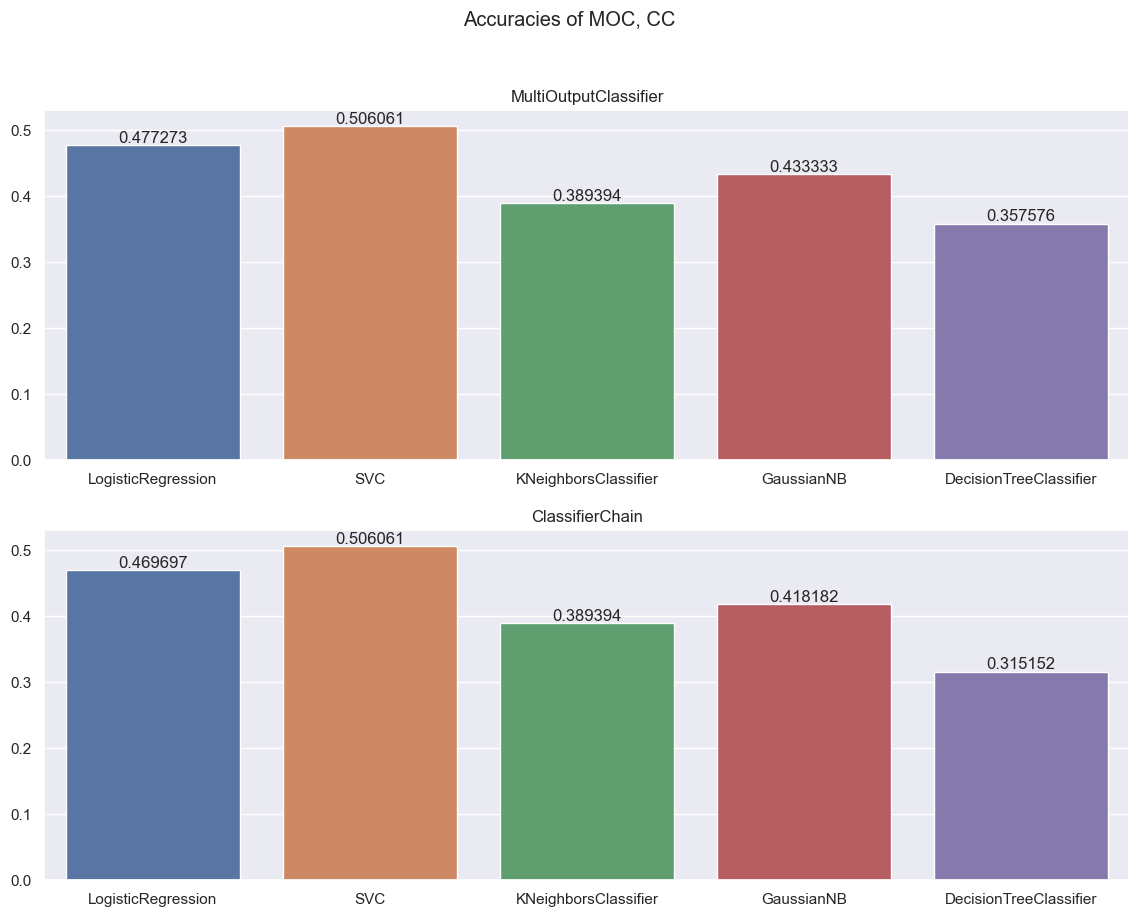

In [454]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharey=True)
fig.suptitle('Accuracies of MOC, CC')

b1 = sns.barplot(ax=axes[0], x=list(accuracy['multi'].keys()), y=list(accuracy['multi'].values()))
axes[0].set_title('MultiOutputClassifier')
b1.bar_label(b1.containers[0])
b2 = sns.barplot(ax=axes[1], x=list(accuracy['chain'].keys()), y=list(accuracy['chain'].values()))
axes[1].set_title('ClassifierChain')
b2.bar_label(b2.containers[0])

plt.show()

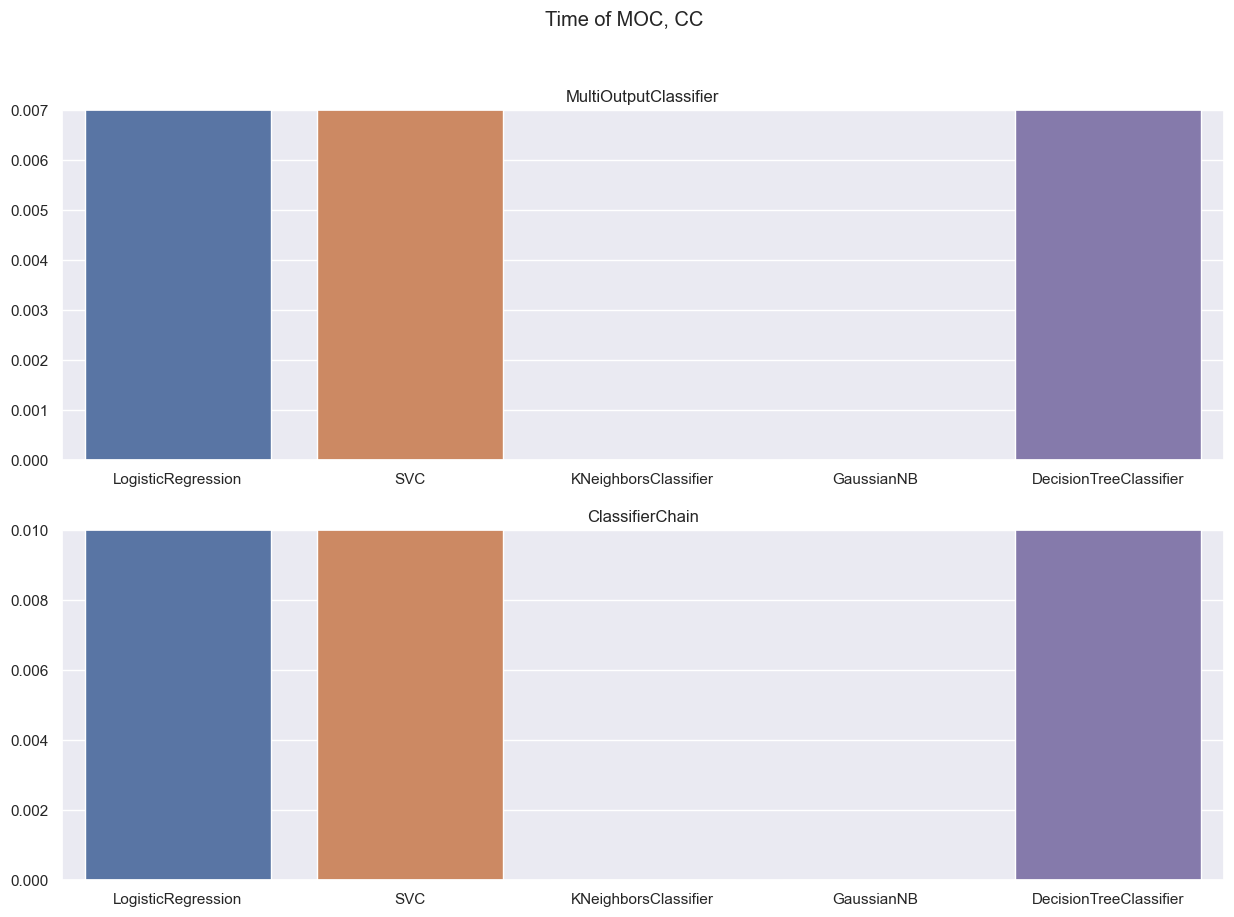

In [455]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharey=False)
fig.suptitle('Time of MOC, CC')

b1 = sns.barplot(ax=axes[0], x=list(times['multi'].keys()), y=list(times['multi'].values()))
axes[0].set_title('MultiOutputClassifier')
b1.set_ylim(0, 0.007)
b2 = sns.barplot(ax=axes[1], x=list(times['chain'].keys()), y=list(times['chain'].values()))
axes[1].set_title('ClassifierChain')
b2.set_ylim(0, 0.01)

plt.show()

(**+2 балла**) Повторить все пункты для задачи **Multioutput Regression** (регрессия с несколькими целевыми признаками, вещественными). Модель попробовать как минимум одну: **Ridge**. В качестве стратегий попробовать **MultiOutputRegressor** и **RegressorChain**. В качестве метрики использовать **R2**.

In [456]:
corr.sort_values(by=["px_width"],ascending=False).iloc[0].sort_values(ascending=False)

px_width         1.000000
px_height        0.510664
price_range      0.165818
sc_w             0.034699
wifi             0.030319
n_cores          0.024480
m_dep            0.023566
sc_h             0.021599
dual_sim         0.014291
four_g           0.007448
talk_time        0.006720
pc               0.004196
ram              0.004105
three_g          0.000350
mobile_wt        0.000090
touch_screen    -0.001628
fc              -0.005176
int_memory      -0.008335
battery_power   -0.008402
clock_speed     -0.009476
blue            -0.041533
Name: px_width, dtype: float64

In [457]:
X = df.drop(['px_width', 'px_height'], axis=1)
y = df[['px_width', 'px_height']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [458]:
models = {}
add_model(fit_model(Ridge, {'alpha': [1]}), models)
add_model(fit_model(RandomForestRegressor, {'max_depth': [5]}), models)

print(models)

{'Ridge': Ridge(alpha=1), 'RandomForestRegressor': RandomForestRegressor(max_depth=5)}


In [459]:
accuracy = {'multi': dict(), 'chain': dict()}
times = {'multi': dict(), 'chain': dict()}
# MultiOutputRegressor
for name, model in models.items():
    classifier = MultiOutputRegressor(model)
    start_time = time.time()
    classifier.fit(X_train, y_train)
    finish_time = time.time()
    accuracy['multi'][name] = classifier.score(X_test, y_test)
    times['multi'][name] = finish_time - start_time
# RegressorChain
for name, model in models.items():
    classifier = RegressorChain(model)
    start_time = time.time()
    classifier.fit(X_train, y_train)
    finish_time = time.time()
    accuracy['chain'][name] = classifier.score(X_test, y_test)
    times['chain'][name] = finish_time - start_time

In [460]:
print(accuracy)
print(times)

{'multi': {'Ridge': 0.24468477691421314, 'RandomForestRegressor': 0.17459070062286974}, 'chain': {'Ridge': 0.24468477691421325, 'RandomForestRegressor': 0.12991201775061106}}
{'multi': {'Ridge': 0.0, 'RandomForestRegressor': 0.48172879219055176}, 'chain': {'Ridge': 0.0, 'RandomForestRegressor': 0.47091007232666016}}


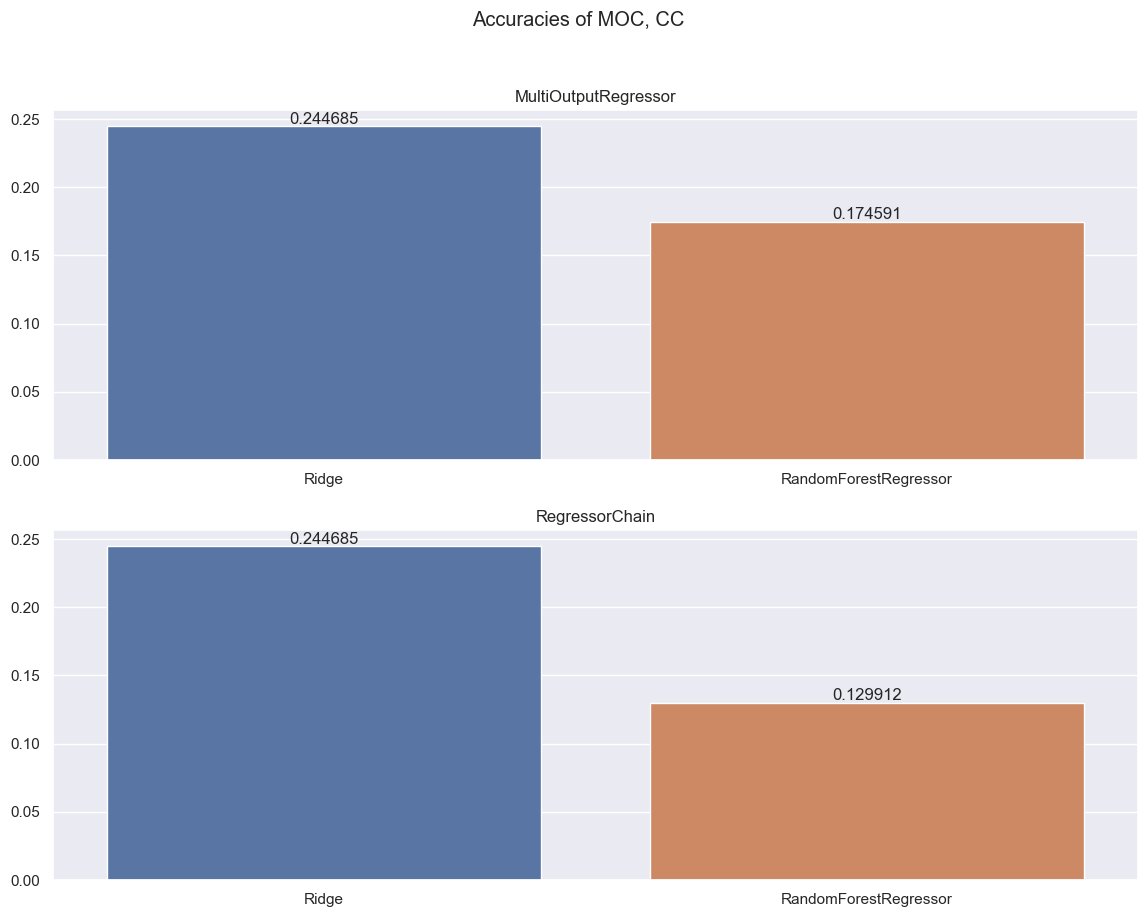

In [461]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharey=True)
fig.suptitle('Accuracies of MOC, CC')

b1 = sns.barplot(ax=axes[0], x=list(accuracy['multi'].keys()), y=list(accuracy['multi'].values()))
axes[0].set_title('MultiOutputRegressor')
b1.bar_label(b1.containers[0])
b2 = sns.barplot(ax=axes[1], x=list(accuracy['chain'].keys()), y=list(accuracy['chain'].values()))
axes[1].set_title('RegressorChain')
b2.bar_label(b2.containers[0])

plt.show()

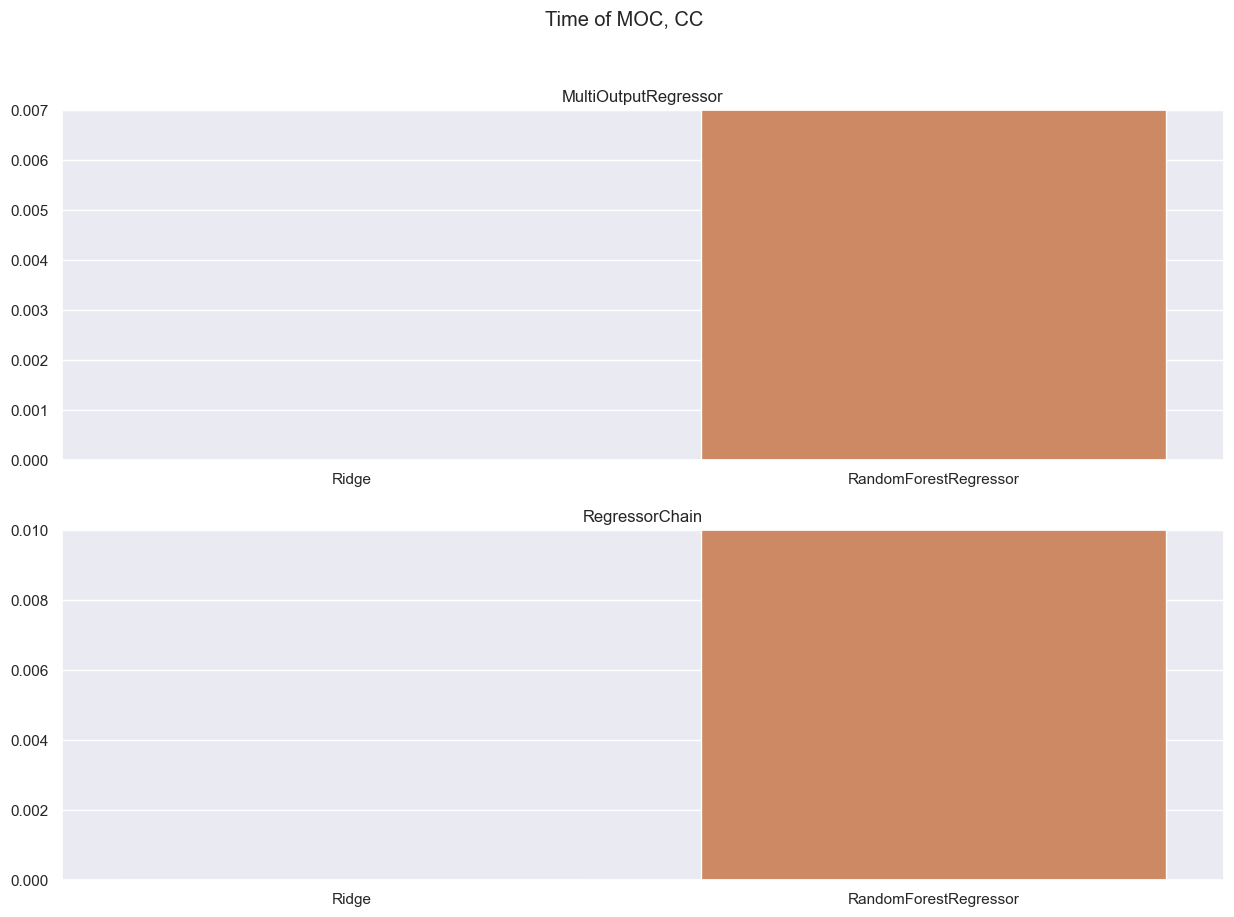

In [462]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharey=False)
fig.suptitle('Time of MOC, CC')

b1 = sns.barplot(ax=axes[0], x=list(times['multi'].keys()), y=list(times['multi'].values()))
axes[0].set_title('MultiOutputRegressor')
b1.set_ylim(0, 0.007)
b2 = sns.barplot(ax=axes[1], x=list(times['chain'].keys()), y=list(times['chain'].values()))
axes[1].set_title('RegressorChain')
b2.set_ylim(0, 0.01)

plt.show()